# Bank Loan
## Non Linear Relationships
## Non-Linear Regression - Experimentation

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

import os
print(os.getcwd())

c:\Users\haris\Desktop\GitHub_Projects\Statistics


In [9]:
loan_df = pd.read_csv("RawData/Accepted_Loan_Summary.csv")
loan_df.head() 

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,3585,3183,19.737013,13660.71827,55000,63396.10292,15.352285,2.463470,0.520266
1,510,8223,7191,19.747810,13889.67226,56000,65446.52263,15.440212,5.565445,1.175378
2,520,9792,8370,20.085761,14186.13920,58728,68261.38708,15.312451,6.477927,1.368087
3,530,10984,9254,20.253199,14487.00838,60000,69041.52340,15.449011,7.162095,1.512578
4,540,12333,10127,20.770446,14756.36706,60000,69948.95243,15.271022,7.837750,1.655271


In [10]:
loan_df[['fico_score', 'loan_total']].corr('spearman')

,fico_score,loan_total
fico_score,1.000000,0.043243
loan_total,0.043243,1.000000


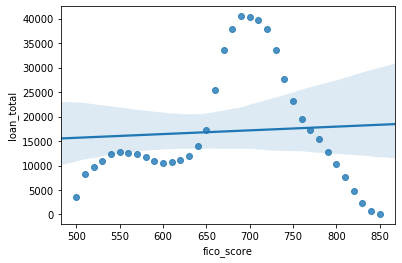

In [11]:
sns.regplot(x='fico_score', y= 'loan_total', data=loan_df)

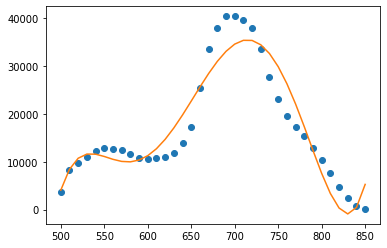

In [12]:
coeff = np.poly1d(np.polyfit(loan_df['fico_score'], loan_df['loan_total'], 5))

t = loan_df['fico_score']
plt.plot(loan_df['fico_score'], loan_df['loan_total'], 'o', t, coeff(t), '-')
plt.show()

In [13]:
loan_df[['dti', 'loan_total']].corr('spearman')

,dti,loan_total
dti,1.000000,0.029344
loan_total,0.029344,1.000000


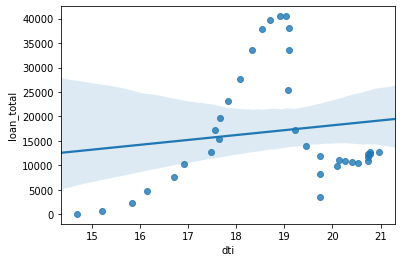

In [14]:
sns.regplot(x = 'dti', y='loan_total', data=loan_df)

In [21]:
polynomial_features = PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(loan_df[['dti']])
model = LinearRegression()
model.fit(x_poly, loan_df['loan_total'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = model.predict(x_poly)
print('Model_coef :', model.coef_)
print('Model_intercept :', model.intercept_)

Model_coef : [ 0.00000000e+00 -1.33678762e+07  1.11964965e+06 -4.13729904e+04
  5.69311839e+02]
Model_intercept : 59406562.59501092


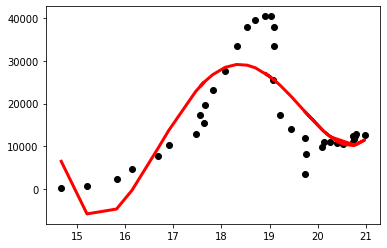

In [30]:
plt.scatter(loan_df['dti'], loan_df['loan_total'], color='black')
plt.plot(loan_df['dti'], y_pred, color='red', linewidth=3)

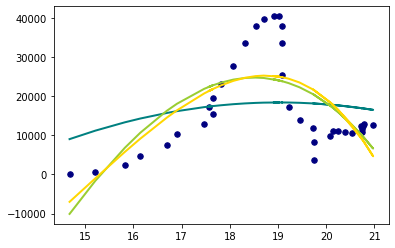

In [35]:
plt.scatter(loan_df['dti'], loan_df['loan_total'], color='navy', s=30, marker='o', label="training points")
colors = ['teal', 'yellowgreen', 'gold']
lw = 2

for count, degree in enumerate([2,3,4]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(loan_df[['dti']], loan_df['loan_total'])
    y_plot = model.predict(loan_df[['dti']])
    plt.plot(loan_df['dti'], y_plot, color=colors[count], linewidth=lw, label="degree %d" % degree)